In [1]:
import tensorflow as tf
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import log_loss
import numpy as np
import pickle
from sklearn.externals import joblib
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import explained_variance_score, mean_squared_error

/home/ruby/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
#Load MNIST data from tf
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=False)
# mnist_one_hot = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
train_images = mnist.train.images
train_labels = mnist.train.labels
test_images = mnist.test.images
test_labels = mnist.test.labels

In [4]:
def trainRandomForest(index):
    model = RandomForestClassifier(n_estimators=index,n_jobs=4)
#     print index
#     model.random_state(index)
    model.fit(train_images, train_labels)
    return model

models = {}
for i in [3,25,77,99]:
    print i
    model = trainRandomForest(i)
    models[i] = model

# joblib.dump(models, 'random_forest_models.pkl')
# print models

3
25
77
99


In [5]:
def plot_uncertainty(model,test_images,test_labels):
    predicted_output = model.predict_proba(test_images)
    
    zero = np.where(test_labels == 0)[0]
    one = np.where(test_labels == 1)[0]
    two = np.where(test_labels == 2)[0]
    three = np.where(test_labels == 3)[0]
    four = np.where(test_labels == 4)[0]
    five = np.where(test_labels == 5)[0]
    six = np.where(test_labels == 6)[0]
    seven = np.where(test_labels == 7)[0]
    eight = np.where(test_labels == 8)[0]
    nine = np.where(test_labels == 9)[0]
    fig, ax = plt.subplots(1,figsize=(8,6))
    
    ax.hist(predicted_output[zero, 0], histtype='step', label='zero')
    ax.hist(predicted_output[one, 1], histtype='step', label='one')
    ax.hist(predicted_output[two, 2], histtype='step', label='two')
    ax.hist(predicted_output[three, 3], histtype='step', label='three')
    ax.hist(predicted_output[four, 4], histtype='step', label='four')
    ax.hist(predicted_output[five, 5], histtype='step', label='five')
    ax.hist(predicted_output[six, 6], histtype='step', label='six')
    ax.hist(predicted_output[seven, 7], histtype='step', label='seven')
    ax.hist(predicted_output[eight, 8], histtype='step', label='eight')
    ax.hist(predicted_output[nine, 9], histtype='step', label='nine')

    ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2),
              ncol=5, fancybox=True, shadow=True)
    
    ax.set_xlabel('Prediction (Classes probability)')
    ax.set_ylabel('Number of observations')

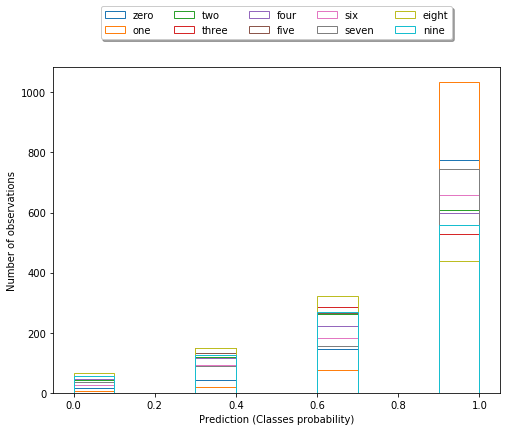

In [6]:
plot_uncertainty(models[3],test_images,test_labels)

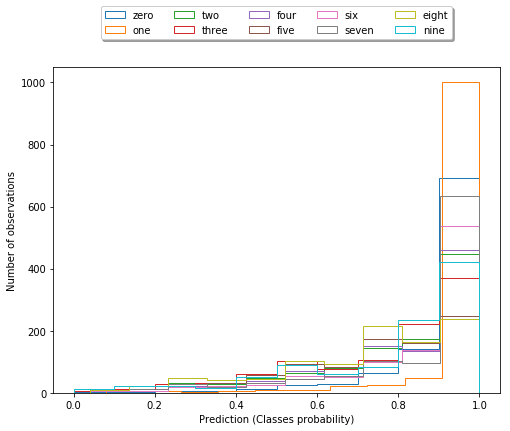

In [7]:
plot_uncertainty(models[25],test_images,test_labels)

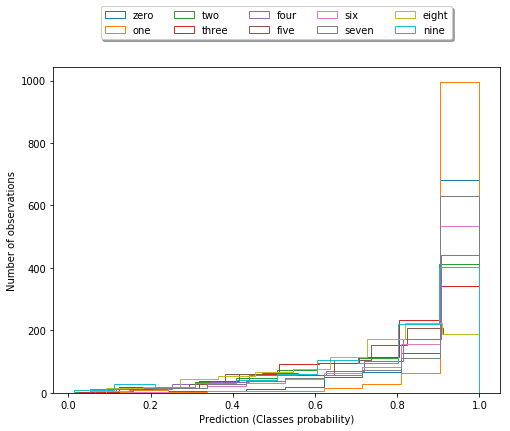

In [8]:
plot_uncertainty(models[77],test_images,test_labels)

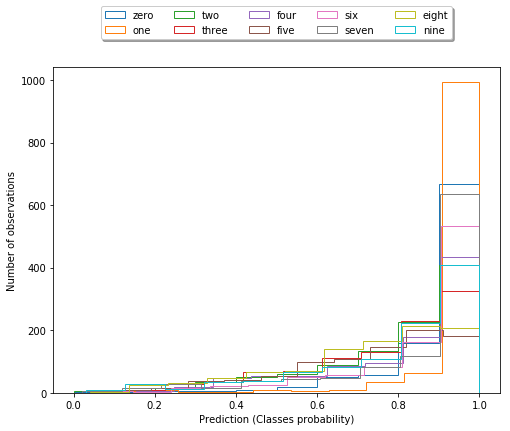

In [9]:
plot_uncertainty(models[99],test_images,test_labels)

In [10]:
print models[25].score(test_images,test_labels)

0.9618


In [11]:
print models[77].score(test_images,test_labels)

0.9685


In [12]:
print models[99].score(test_images,test_labels)

0.9702


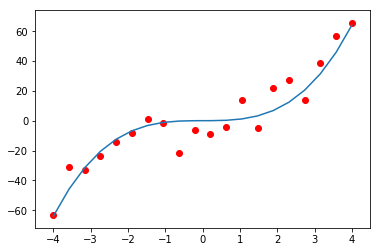

In [13]:
# Generating samples between -4 and 4 for training
num_of_data = 20
x = np.linspace(-4,4,num_of_data)

# Generating noise with mean 0 and standard deviation 3^2
noise = np.random.normal(0,9,num_of_data)

# Generating output and adding noise
y = x**3
y_noise = y + noise

# Plotting
plt.plot(x,y)
plt.scatter(x,y_noise,color="red")

In [14]:
# Training model with 10 members in ensemble
sinmodel = RandomForestRegressor(n_estimators=10,n_jobs=4)
sinmodel.fit(x.reshape(20,1),y.reshape(20,1))

/home/ruby/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=4,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [15]:
# Generating test samples
test_x = np.linspace(-6,6,20)
test_y = test_x**3

In [16]:
# Predicting the test samples
test_predict = sinmodel.predict(test_x.reshape(20,1))

In [17]:
# function to find the upper and lower error bounds for the predicted values
def find_bounds(model, X, percentile=95):
    err_down = []
    err_up = []
    for x in range(len(X)):
        preds = []
        for pred in model.estimators_:
            preds.append(pred.predict(X[x])[0])
        err_down.append(np.percentile(preds, (100 - percentile) / 2. ))
        err_up.append(np.percentile(preds, 100 - (100 - percentile) / 2.))
    return err_down, err_up

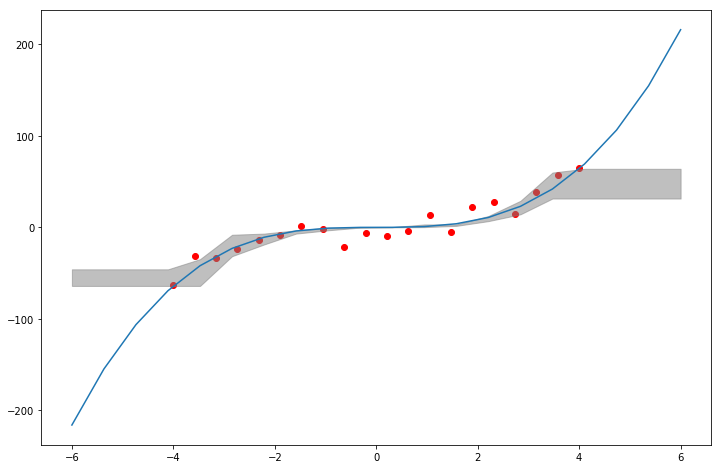

In [18]:
lower,upper = find_bounds(sinmodel,test_x)
plt.figure(figsize=(12,8))
plt.plot(test_x,test_y)
plt.scatter(x,y_noise,color="red")
plt.fill_between(test_x, lower, upper, color='grey', alpha=0.5)

http://www.statisticshowto.com/probability-and-statistics/confidence-interval/

https://blog.datadive.net/prediction-intervals-for-random-forests/